In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the uploaded Excel file
file_path = 'combined_averages.xlsx'
#Columnas a comparar
columnas = [    "Abstaylor",
    "Hybrid-sa-pso30",
    "Hybrid-sa-pso50",
    "Hybrid-sa-pso70",]


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':    Problema  Abstaylor  Hybrid-sa-pso30  Hybrid-sa-pso30-5it  Hybrid-sa-pso50  \
  0      chem    2608.92          4348.76              4239.11          5429.88   
  1    chem-1    2744.01          4303.91              4216.72          5261.08   
  2   chembis    1367.06          2163.24              2075.99          2733.06   
  3  dualc5\n     119.51           186.74               123.91           219.76   
  4  dualc8\n     480.74          1677.91               858.21          2513.53   
  
     Hybrid-sa-pso50-5it  Hybrid-sa-pso70  Hybrid-sa-pso70-5it  \
  0              4750.24          6530.78              5349.71   
  1              4787.63          6222.78              5436.93   
  2              2532.91          3332.96              2882.73   
  3               145.05           221.22               149.63   
  4              1191.94          3017.50              1323.23   
  
     Particle-swarp-optimization30  Particle-swarp-opti

In [47]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['chem',
 'chem-1',
 'chembis',
 'dualc5\n',
 'dualc8\n',
 'ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9bis',
 'ex6_1_3',
 'ex6_1_3bis',
 'ex6_2_10',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'ex8_5_1bis',
 'himmel16',
 'hs088\n',
 'hs093\n',
 'hs102\n',
 'hs103\n',
 'hs108\n',
 'hs113\n',
 'launch',
 'mistake\n',
 'odfits\n',
 'sambal']

In [48]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Abstaylor  Particle-swarp-optimization30  Particle-swarp-optimization50  \
 0    2608.92                        3646.15                        5028.04   
 1    2744.01                        4112.10                        5074.95   
 2    1367.06                        2191.57                        2681.68   
 3     119.51                         151.60                         139.18   
 4     480.74                        1166.96                        1296.97   
 
    Particle-swarp-optimization70  
 0                        5774.16  
 1                        5884.81  
 2                        3104.37  
 3                         131.67  
 4                        1234.64  ,
 'Nodos':    Abstaylor  Particle-swarp-optimization30  Particle-swarp-optimization50  \
 0   905104.8                       907333.6                       910318.8   
 1   905104.8                       907333.6                       910318.8   
 2   480774.8                       484421.6      

In [49]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Particle-swarp-optimization30  Particle-swarp-optimization50  \
 0    0.152951                       0.213759                       0.294774   
 1    0.154021                       0.230811                       0.284856   
 2    0.146293                       0.234526                       0.286974   
 3    0.220514                       0.279725                       0.256809   
 4    0.115029                       0.279223                       0.310331   
 5    0.062033                       0.238537                       0.306706   
 6    0.138924                       0.249895                       0.289516   
 7    0.168931                       0.265740                       0.268974   
 8    0.173050                       0.261277                       0.279149   
 9    0.240302                       0.317268                       0.233505   
 10   0.144948                       0.251143                       0.271875   
 11   0.154465               

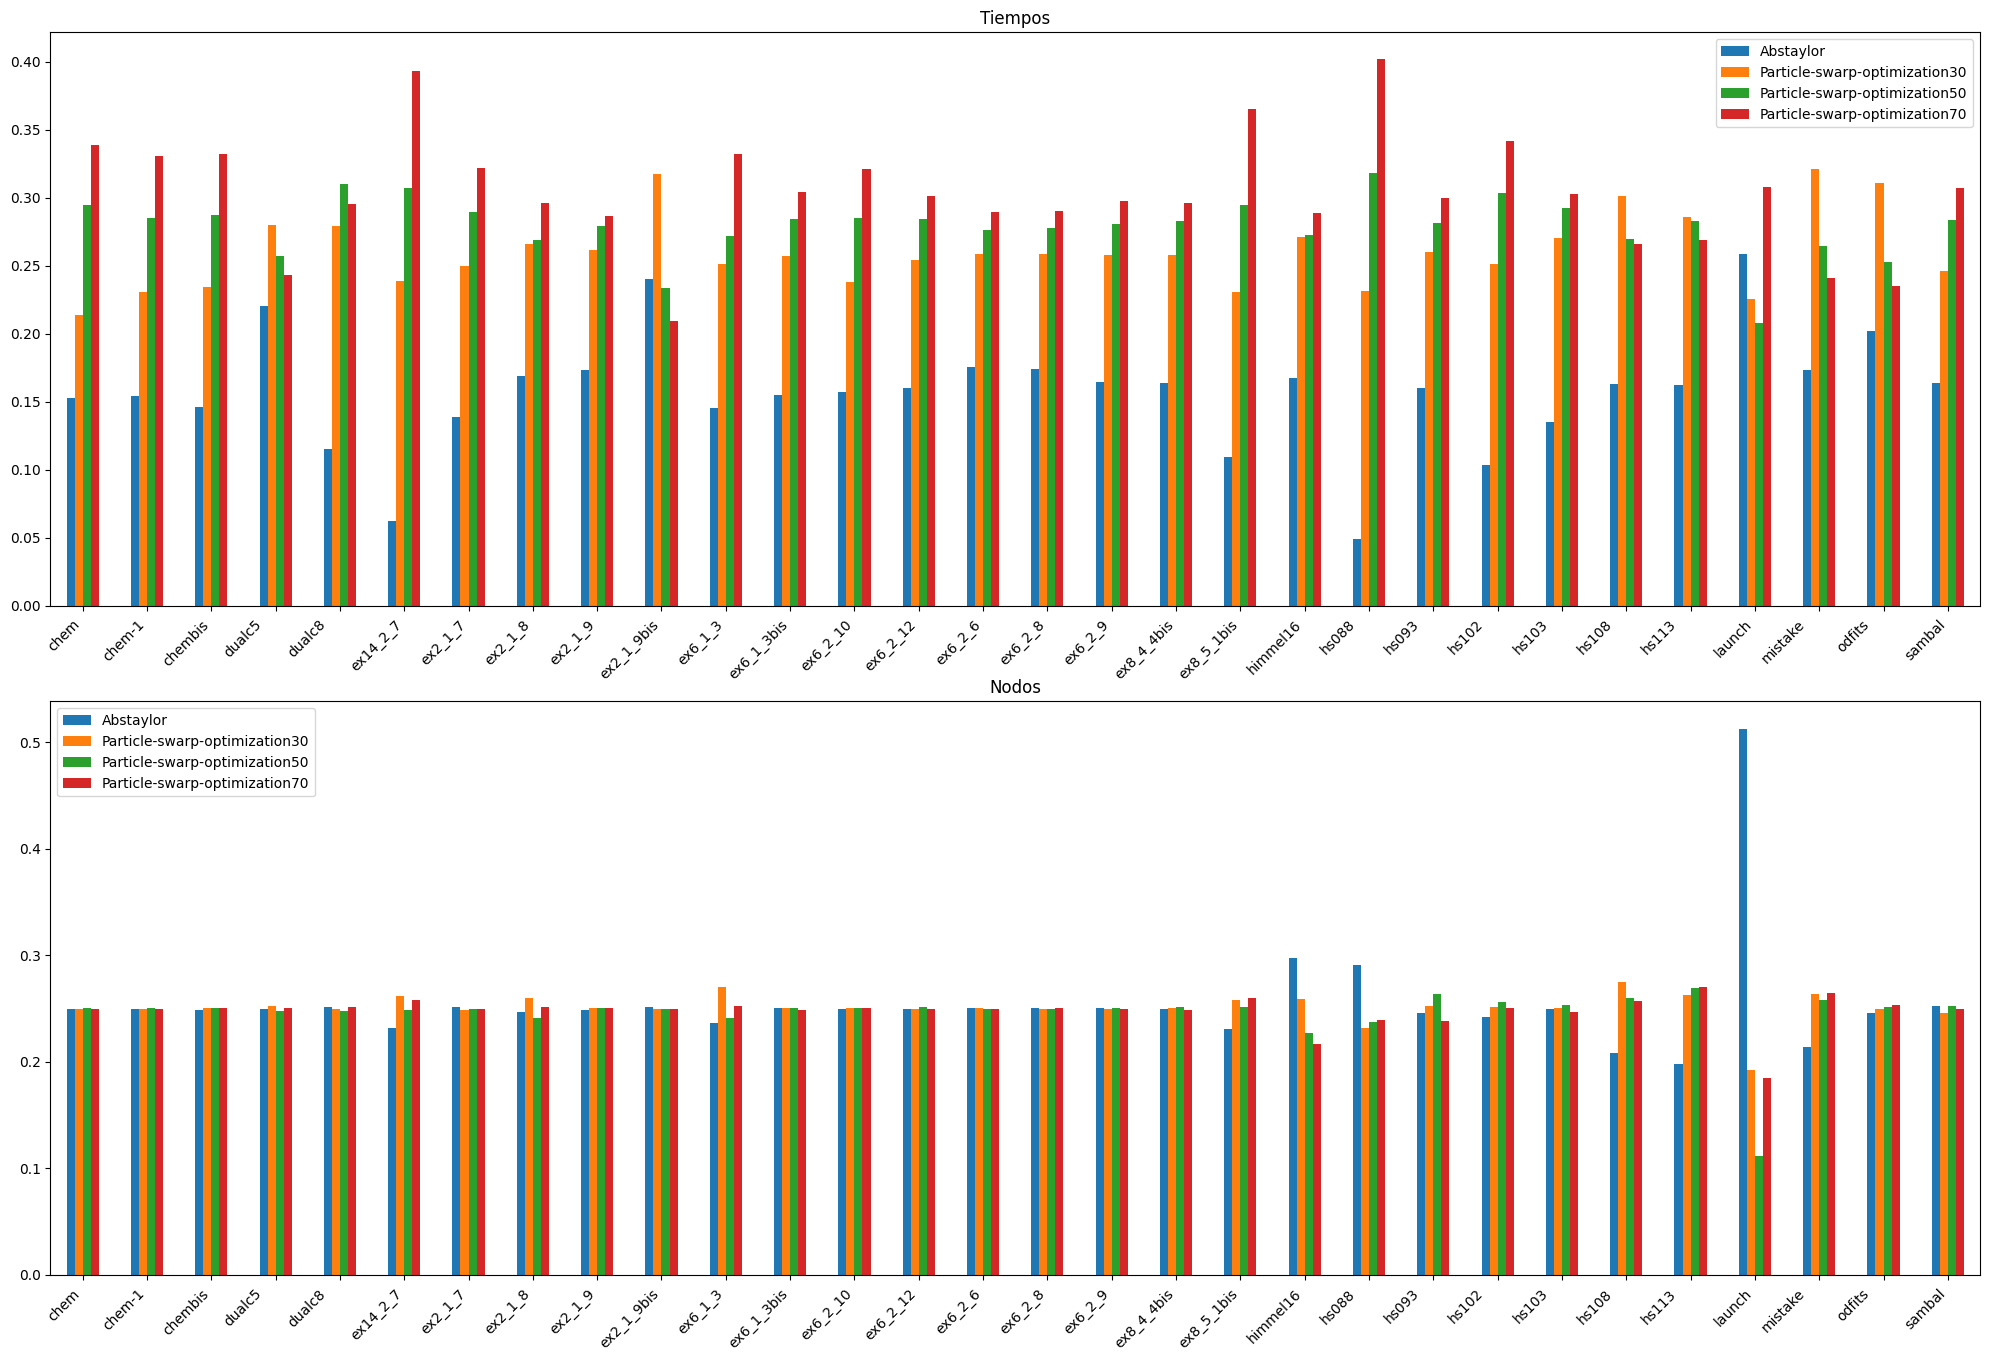

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # Aumenté la altura de la figura

data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Rotar y alinear las etiquetas del eje X
for ax in axs:
    ax.set_xticklabels(problemas, rotation=45, ha='right')
    ax.tick_params(axis='x', which='major', pad=5)  # Aumentar el espacio entre las etiquetas y el eje

# Ajustar el espacio entre los subplots y los bordes de la figura
plt.tight_layout()

# Añadir más espacio en la parte inferior para las etiquetas
plt.subplots_adjust(bottom=0.2)

plt.show()

In [51]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Particle-swarp-optimization30  Particle-swarp-optimization50  \
 0    0.152951                       0.213759                       0.294774   
 1    0.154021                       0.230811                       0.284856   
 2    0.146293                       0.234526                       0.286974   
 3    0.220514                       0.279725                       0.256809   
 4    0.115029                       0.279223                       0.310331   
 5    0.062033                       0.238537                       0.306706   
 6    0.138924                       0.249895                       0.289516   
 7    0.168931                       0.265740                       0.268974   
 8    0.173050                       0.261277                       0.279149   
 9    0.240302                       0.317268                       0.233505   
 10   0.144948                       0.251143                       0.271875   
 11   0.154465               

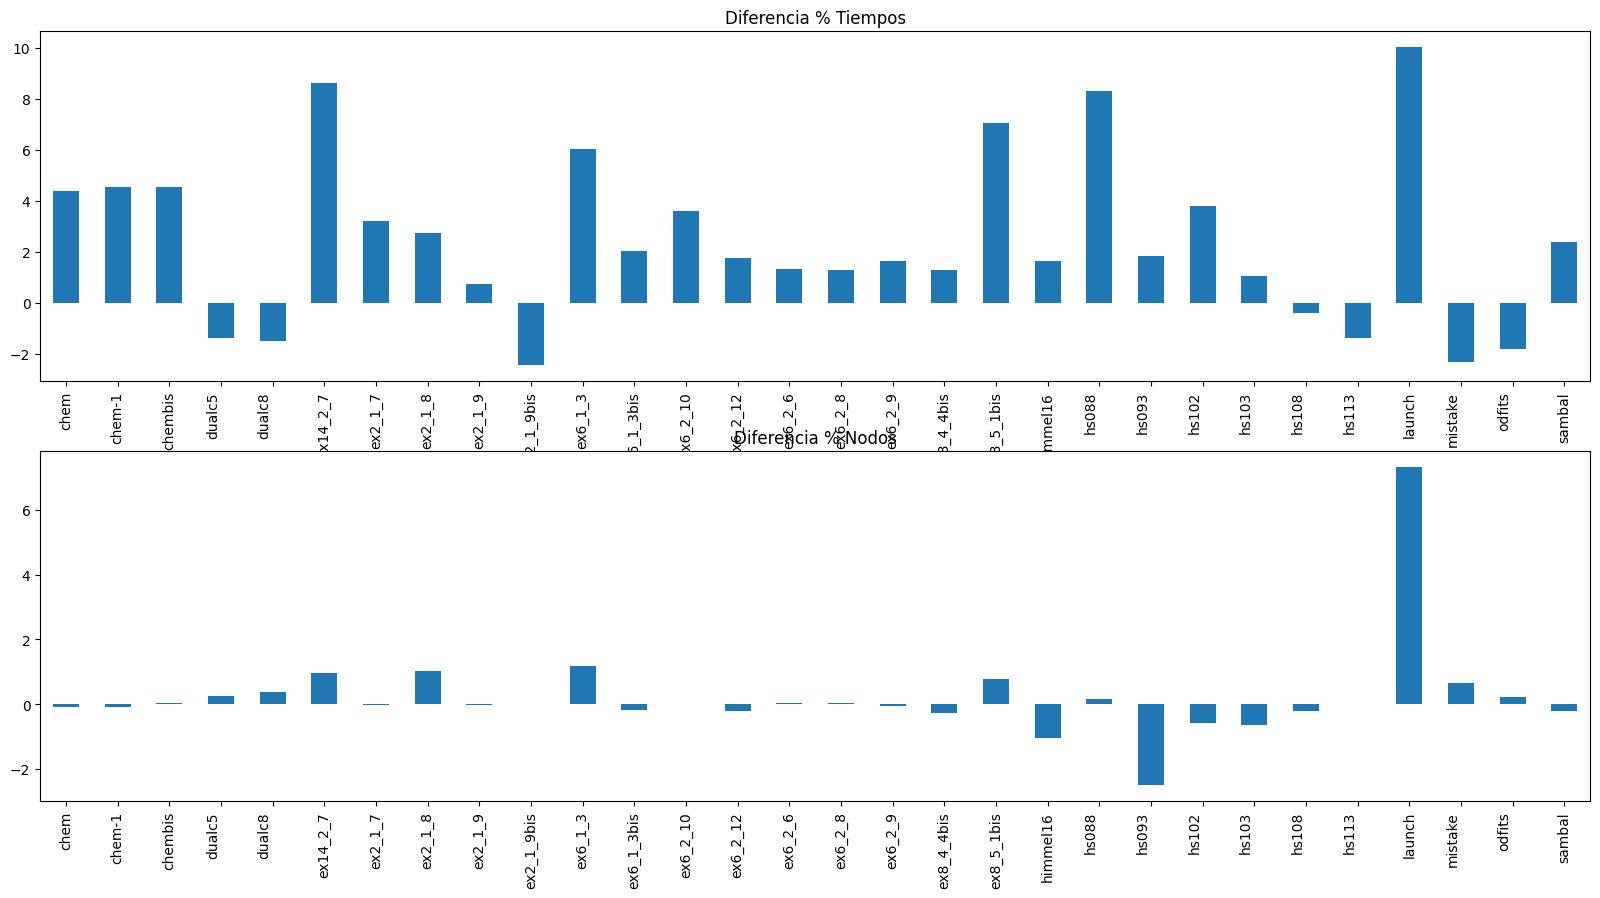

In [52]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [53]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': np.float64(2.418524313649045),
 'Nodos': np.float64(0.22962432578163502)}

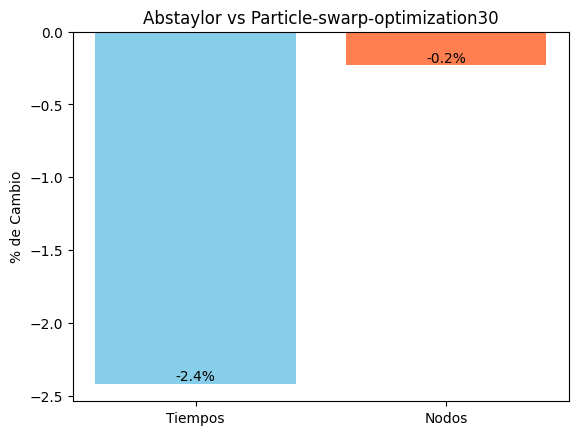

In [54]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [55]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Particle-swarp-optimization30  Particle-swarp-optimization50  \
 0    0.152951                       0.213759                       0.294774   
 1    0.154021                       0.230811                       0.284856   
 2    0.146293                       0.234526                       0.286974   
 3    0.220514                       0.279725                       0.256809   
 4    0.115029                       0.279223                       0.310331   
 5    0.062033                       0.238537                       0.306706   
 6    0.138924                       0.249895                       0.289516   
 7    0.168931                       0.265740                       0.268974   
 8    0.173050                       0.261277                       0.279149   
 9    0.240302                       0.317268                       0.233505   
 10   0.144948                       0.251143                       0.271875   
 11   0.154465               

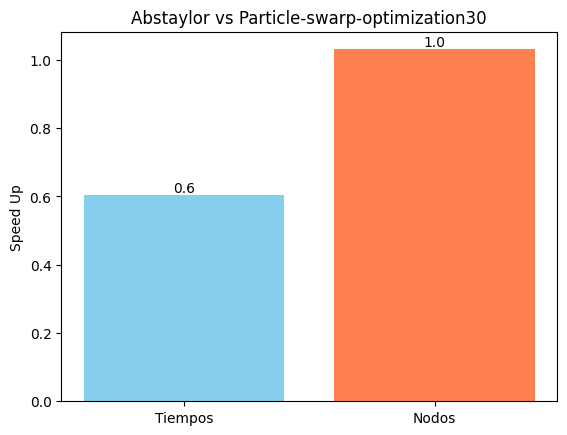

In [56]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()